# **1. Import Libraries & Load Dataset**

Libraries

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

Dataset

In [187]:
# import data
df = pd.read_excel('titanic.xlsx')
data = df.copy()

# **2. Data Understanding (Exploratory Data Audit)**

## Data Info

In [188]:
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [189]:
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [190]:
data.sample(5)

,survived,name,sex,age
229,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0
294,0,"Thayer, Mr. John Borland",male,49.0
21,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0
366,0,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0
470,1,"Keane, Miss. Nora A",female,NaN


observation:
1. `survived` and `age` column are numerical, `name` and `sex` column are categorical
2. `sex` column seems to contain two distinct values (male or female), but will confirm later
3. `survived` is apparently also binary (0,1)
4. no obvious defect on the data (column name and its entries), all looks good

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


observation:
1. data Contains 4 columns with 500 rows
2. `age` column have missing values (will be handled)
3. Most data types look appropriate. However, the `sex` column will be converted to numeric values to support further analysis

## Statitical Summary

In [192]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [193]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['name', 'sex']

numericals = ['survived', 'age']

In [194]:
# Syntax numerical statistical summary
data[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


observation :
1. `age` has only 451 values out of 500 entries, indicating 49 missing values that need to be handled (e.g., via manipulation or removal)
2. mean ~50% (Median) in `survived` and `age` columns, indicating a symmetric distribution
 * `survived` mean = 0.54, median = 1.0 -> slightly more passengers survived than not, indicating **some imbalance** but still reasonably distributed
 * `age` mean = 35.92, median = 35.00 -> very close values, suggest a **symmetrical age distribution**
3. overall, the minimum and maximum values make sense for both columns
 * `survived` column has values ranging from 0 to 1, which aligns with binary classification (didn't survive vs survived)
 * `age` column ranges from approximately 0.67 to 80 years, which is plausible for titanic passengers

In [195]:
# Syntax describe method on categorical data
data[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


observation:
1. `name` column has 499 unique values out of 500 entries, indicating that one name appears twice (possibly a duplicate or two passengers with the same name).
2. `sex` have 2 unique values, 'male' and 'female'
3. most passengers are **male** (288 out of 500 entries), while the rest are **female**.

In [196]:
categoricals

['name', 'sex']

In [197]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of name column
name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                                        1

In [198]:
for col in numericals:
  print(f"==== {col} ====")
  print(data[col].value_counts(), '\n')

==== survived ====
survived
1    270
0    230
Name: count, dtype: int64 

==== age ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     

# **3. Data Cleaning**

## Duplicate Data

In [199]:
len(data)

500

In [200]:
len(data.drop_duplicates())

499

In [201]:
len(data.drop_duplicates())/len(data)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

0.998

output dari code di cell ini tidak bernilai 1, berarti ada data duplikat

In [202]:
list(data.columns)

['survived', 'name', 'sex', 'age']

In [203]:
# mengambil baris duplikat (termasuk yang asli)
duplicates = data[data.duplicated(keep=False)]

In [204]:
# menampilkan list baris yang duplikat
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [205]:
# menghitung jumlah kemunculan tiap baris duplikat
duplicates.groupby(list(data.columns)).size()

,,,,0
survived,name,sex,age,
1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [206]:
# menampilkan jumlah duplikat dalam format tabel
duplicates.groupby(list(data.columns)).size().reset_index(name='jumlah_duplikat')

,survived,name,sex,age,jumlah_duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [207]:
# menghitung frekuensi kemunculan tiap baris duplikat
duplicates_counts = duplicates.groupby(list(data.columns)).size().reset_index(name='jumlah_duplikat')

# mengurutkan berdasarkan jumlah duplikat
sorted_duplicates = duplicates_counts.sort_values(by='jumlah_duplikat', ascending=False)

# menampilkan hasil
sorted_duplicates

,survived,name,sex,age,jumlah_duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [208]:
# handling drop duplicate
data = data.drop_duplicates()

In [209]:
len(data.drop_duplicates())/len(data)

1.0

output dari code di cell ini bernilai 1, maka sudah tidak ada data duplikat atau sudah terhandle

## Missing Value

###identifying missing value

In [210]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,49


identified 49 missing values in the `age` column

In [211]:
for column in data.columns:
  print(f'========== {column} ==========')
  display(data[column].value_counts())
  print()

========== survived ==========


,count
survived,
1,269
0,230



========== name ==========


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



========== sex ==========


,count
sex,
male,288
female,211



========== age ==========


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [212]:
total_rows = len(data)
total_rows

499

In [213]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [214]:
# percentage version
total_rows = len(data)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


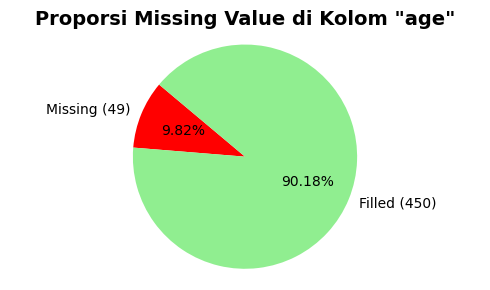

In [215]:
import matplotlib.pyplot as plt

# Hitung jumlah missing per kolom
missing_counts = data.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]

# Cek apakah ada kolom yang missing
if not missing_cols.empty:
    for col in missing_cols.index:
        missing = missing_counts[col]
        filled = len(data) - missing

        plt.figure(figsize=(5, 3))
        plt.pie(
            [missing, filled],
            labels=[f'Missing ({missing})', f'Filled ({filled})'],
            autopct='%1.2f%%',
            colors=['red', 'lightgreen'],
            startangle=140
        )
        plt.title(f'Proporsi Missing Value di Kolom "{col}"', fontweight='bold', fontsize=14)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
else:
    print("✅ Tidak ada kolom yang memiliki missing value.")

The percentage of missing values is below 20%, so we handle missing values in numerical columns using the median and in categorical columns using the mode. In this dataset, only the `age` column has missing values (49 entries or 9.82%), and it's numerical. Other columns such as `survived`, `name`, and `sex` have no missing values.

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       450 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


###Miising Value Handling

In [217]:
# Handling missing value for EDA, without splitting
for column in data.columns:
    if data[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        data[column].fillna(data[column].mode()[0], inplace=True)
    else: # karena tipe data hanya object dan numerik saja tidak ada yg lain, maka pakai else berikut
        # Jika kolom bertipe numerik, isi dengan median
        data[column].fillna(data[column].median(), inplace=True)

<ipython-input-217-899fd06491ef>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-217-899fd06491ef>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [218]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


missing values are handled

#**4. Feature Engineering**

In [220]:
df = data.copy()

##membagi `age` menjadi `age_group`

ubah `age` menjadi kolom `age_group` (baby, toddler, child, teenager, young adult, adult, middle-aged, senior)

In [221]:
def categorize_age(age):
    if pd.isnull(age):
        return 'unknown'
    elif age <= 1:
        return 'Baby\n(0-1)'
    elif age <= 4:
        return 'Toddler\n(2-4)'
    elif age <= 12:
        return 'Child\n(5-12)'
    elif age <= 19:
        return 'Teenager\n(13-19)'
    elif age <= 29:
        return 'Young Adult\n(20-29)'
    elif age <= 44:
        return 'Adult\n(30-44)'
    elif age <= 59:
        return 'Middle-Aged\n(45-59)'
    else:
        return 'Senior\n(60+)'

df['age_group'] = df['age'].apply(categorize_age)

obsevasi:

Distribusi `age_group` bisa dilihat untuk melihat kelompok mana yang paling banyak dan hubungan dengan `survived`

<ipython-input-222-c42932d69802>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_group', order=df['age_group'].value_counts().index, palette='husl')


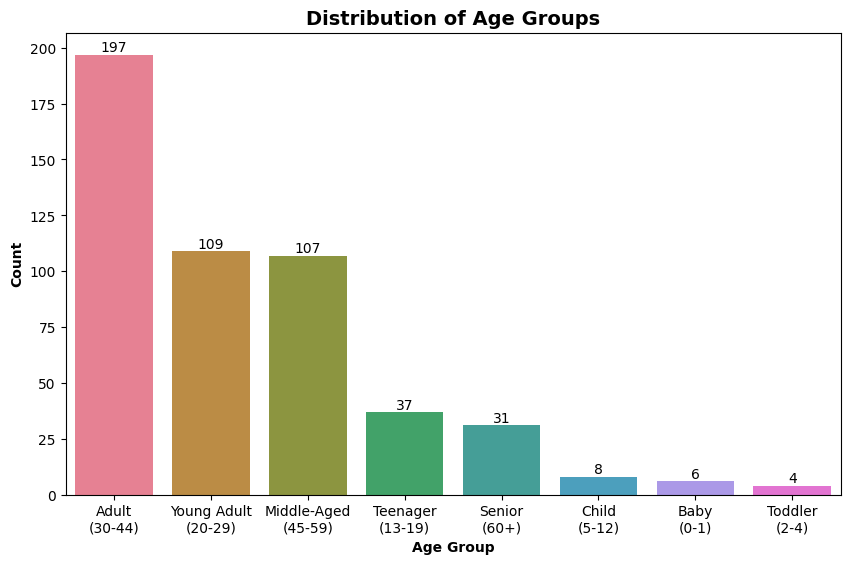

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x='age_group', order=df['age_group'].value_counts().index, palette='husl')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Age Groups', fontweight='bold', fontsize=14)
plt.xlabel('Age Group', fontweight='bold', fontsize=10)
plt.ylabel('Count', fontweight='bold', fontsize=10)
plt.xticks(rotation=0)
plt.show()

## encode `sex`

In [223]:
# Encode kolom sex: male = 0, female = 1
df['sex_encoded'] = df['sex'].map({'female': 0, 'male': 1})

##encode `age_group`

In [224]:
# Mapping age_group ke ordinal
age_group_map = {
    'Baby\n(0-1)': 0,
    'Toddler\n(2-4)': 1,
    'Child\n(5-12)': 2,
    'Teenager\n(13-19)': 3,
    'Young Adult\n(20-29)': 4,
    'Adult\n(30-44)': 5,
    'Middle-Aged\n(45-59)': 6,
    'Senior\n(60+)': 7,
    'unknown': -1  # Untuk yang missing age
}
df['age_group_encoded'] = df['age_group'].map(age_group_map)

## Ekstraksi `title` dari `name`

Ambil gelar (seperti Mr., Mrs., Miss, dll) dari `name`

In [225]:
df['title'] = df['name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()

# Normalisasi title yang tidak umum
df['title'] = df['title'].replace(['Mlle', 'Ms'], 'Miss')
df['title'] = df['title'].replace(['Mme'], 'Mrs')
df['title'] = df['title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Sir', 'Don', 'Dona', 'Lady', 'Jonkheer', 'the Countess'], 'Rare')

In [226]:
df['title'].value_counts()

,count
title,
Mr,256
Mrs,117
Miss,90
Rare,25
Master,11


observasi:
* `Mr`, `Mrs`, `Miss` adalah yang paling umum
* gelar bisa mencerminkan status sosial yang bisa berpengaruh ke peluang selamat
* `Rare` mengelompokkan title yang sangat sedikit muncul (misal `Dr`, `Rev`, `Col`, `Lady`, `Jonkheer`, dll). beberapa title di sini juga mencerminkan status sosial tinggi (misal bangsawan), yang *mungkin* punya akses lebih baik ke fasilitas atau perahu penyelamat

##Encode Fitur Kategorikal

In [227]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
df['sex_encoded'] = le_sex.fit_transform(df['sex'])

le_title = LabelEncoder()
df['title_encoded'] = le_title.fit_transform(df['title'])

In [228]:
df.head()

,survived,name,sex,age,age_group,sex_encoded,age_group_encoded,title,title_encoded
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,Young Adult\n(20-29),0,4,Miss,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,Baby\n(0-1),1,0,Master,0
2,0,"Allison, Miss. Helen Loraine",female,2.0000,Toddler\n(2-4),0,1,Miss,1
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,Adult\n(30-44),1,5,Mr,2
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,Young Adult\n(20-29),0,4,Mrs,3


##Encode Result

###Before Encode

In [229]:
df[['survived', 'name', 'sex', 'age', 'age_group', 'title']].head()

,survived,name,sex,age,age_group,title
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,Young Adult\n(20-29),Miss
1,1,"Allison, Master. Hudson Trevor",male,0.9167,Baby\n(0-1),Master
2,0,"Allison, Miss. Helen Loraine",female,2.0000,Toddler\n(2-4),Miss
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,Adult\n(30-44),Mr
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,Young Adult\n(20-29),Mrs


###After Encode

In [230]:
df[['survived', 'name', 'sex_encoded', 'age_group_encoded', 'title_encoded']].head()

,survived,name,sex_encoded,age_group_encoded,title_encoded
0,1,"Allen, Miss. Elisabeth Walton",0,4,1
1,1,"Allison, Master. Hudson Trevor",1,0,0
2,0,"Allison, Miss. Helen Loraine",0,1,1
3,0,"Allison, Mr. Hudson Joshua Creighton",1,5,2
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,4,3


Transforming features into numerical values makes the dataset ready for further analysis or predictive modeling. This step ensures that models can recognize patterns and relationships within categorical data.

# **5. Exploratory Data Analysis (EDA) + Insights**

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Analisis Univariat
Memahami distribusi dan karakteristik masing-masing fitur

### Distribusi `age`

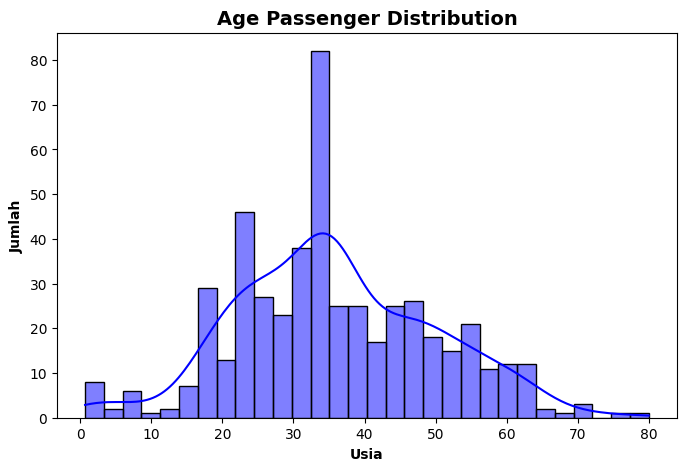

In [232]:
# Histogram dan KDE untuk distribusi usia
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='age', kde=True, bins=30, color='blue')
plt.title('Age Passenger Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Usia', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.show()

* Mayoritas penumpang berusia antara 20 hingga 40 tahun, dengan puncak tertinggi di sekitar usia 35 tahun.

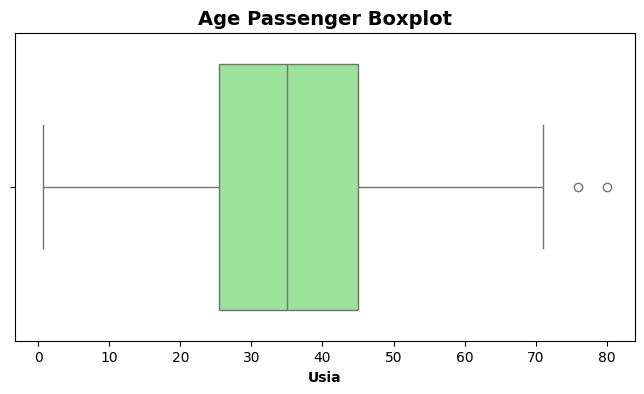

In [233]:
# Boxplot untuk mendeteksi outlier usia
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='age', color='lightgreen')
plt.title('Age Passenger Boxplot', fontweight='bold', fontsize=14)
plt.xlabel('Usia', fontweight='bold')
plt.show()

* Usia median penumpang berada di sekitar 36 tahun
* Rentang interkuartil (IQR) berada di kisaran usia sekitar 22 hingga 50 tahun
* Terlihat ada outlier di atas usia 70 tahun, yang ditandai dengan titik-titik di luar whiskers (sekitar usia 74–80).

### Distribusi `sex`

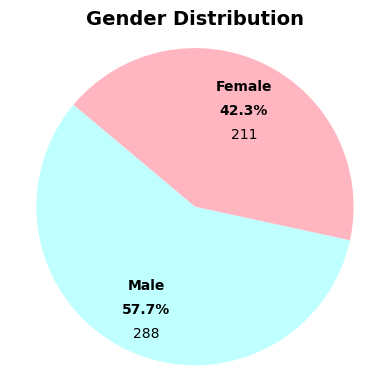

In [234]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from math import sin, cos, pi

# data jumlah berdasarkan jenis kelamin
gender_counts = data['sex'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['#BFFFFF', '#FFB6C1']  # Baby blue & baby pink

bold_font = FontProperties(weight='bold')

# pie chart
plt.figure(figsize=(4, 4))
wedges, texts = plt.pie(
    sizes,
    startangle=140,
    colors=colors,
    wedgeprops={'linewidth': 0}
)

# label
total = sum(sizes)
for wedge, label, size in zip(wedges, labels, sizes):
    percent = size / total * 100
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = wedge.r * 0.7 * cos(angle * pi / 180)
    y = wedge.r * 0.7 * sin(angle * pi / 180)

    plt.text(x, y + 0.1, label.capitalize(), ha='center', fontproperties=bold_font)
    plt.text(x, y - 0.05, f'{percent:.1f}%', ha='center', fontproperties=bold_font)
    plt.text(x, y - 0.2, str(size), ha='center', fontsize=10)

# judul
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

* Mayoritas penumpang adalah laki-laki

### Distribusi `survived`

<ipython-input-235-b43989e9fd2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='survived', palette='Set1')


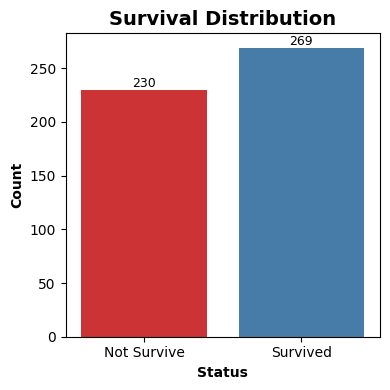

In [235]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=df, x='survived', palette='Set1')

plt.title('Survival Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Status', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([0, 1], ['Not Survive', 'Survived'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

* Lebih banyak penumpang yang selamat

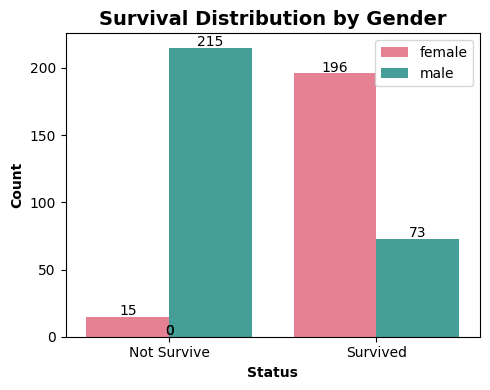

In [236]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='survived', hue='sex', palette='husl')

plt.title('Survival Distribution by Gender', fontweight='bold', fontsize=14)
plt.xlabel('Status', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([0, 1], ['Not Survive', 'Survived'])
plt.legend(title='')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height +1,
            f'{int(height)}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

* Perempuan memiliki jumlah yang selamat lebih tinggi dibandingkan yang tidak selamat.
* Laki-laki memiliki jumlah yang tidak selamat jauh lebih besar dibandingkan jumlah yang selamat.
* Ini mendukung aturan "women and children first"

###Distribusi `age_group`

<ipython-input-237-79006328c709>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


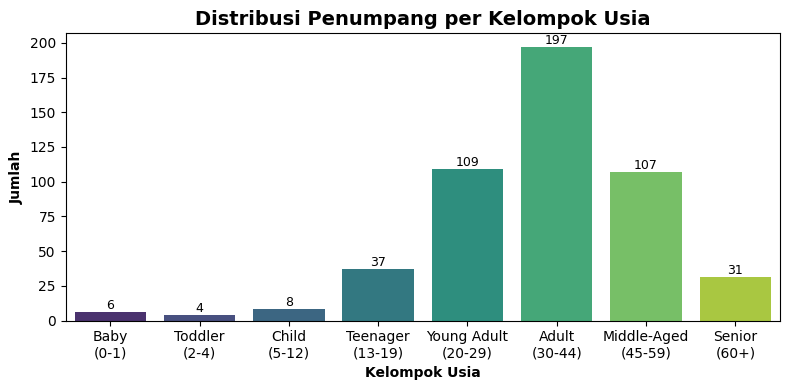

In [237]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    data=df,
    x='age_group',
    order=[
        'Baby\n(0-1)', 'Toddler\n(2-4)', 'Child\n(5-12)', 'Teenager\n(13-19)',
        'Young Adult\n(20-29)', 'Adult\n(30-44)', 'Middle-Aged\n(45-59)',
        'Senior\n(60+)' ], palette='viridis')

plt.title('Distribusi Penumpang per Kelompok Usia', fontsize=14, fontweight='bold')
plt.xlabel('Kelompok Usia', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


* Kelompok usia dewasa (30–44) adalah yang paling banyak.

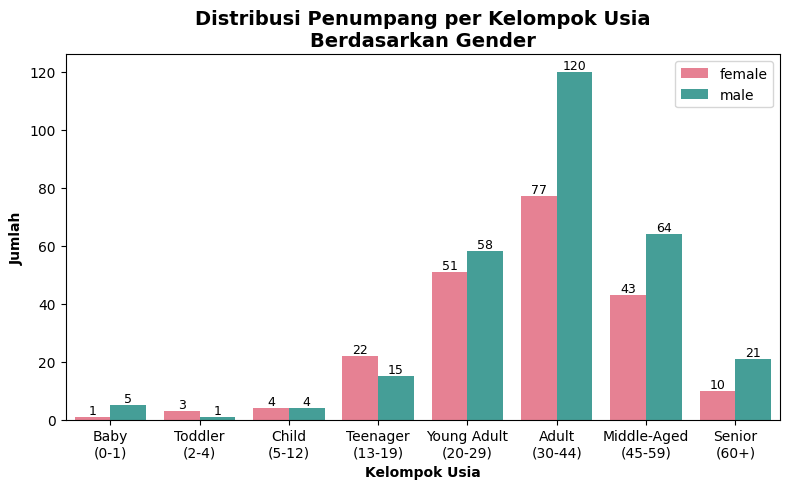

In [238]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='age_group',
    hue='sex',
    order=['Baby\n(0-1)', 'Toddler\n(2-4)', 'Child\n(5-12)', 'Teenager\n(13-19)','Young Adult\n(20-29)',
           'Adult\n(30-44)', 'Middle-Aged\n(45-59)', 'Senior\n(60+)'], palette='husl')

plt.title('Distribusi Penumpang per Kelompok Usia\nBerdasarkan Gender', fontsize=14, fontweight='bold')
plt.xlabel('Kelompok Usia', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

* Penumpang terbanyak ada di Kelompok usia Dewasa (30–44) tahun, didominasi laki-laki.
* Hampir semua kelompok usia didominasi laki-laki.
* Hanya Kelompok usia Remaja (13–19) yang lebih banyak perempuan.
* Kelompok Usia bayi hingga anak-anak jumlahnya sedikit dan cukup seimbang.

###Distribusi `title`

<ipython-input-239-54230f0c4e1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot( data=df, x='title',


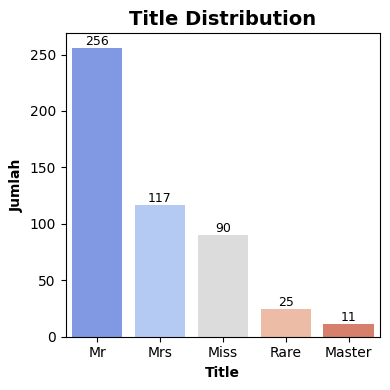

In [239]:
plt.figure(figsize=(4,4))
ax = sns.countplot( data=df, x='title',
    order=df['title'].value_counts().index,
    palette='coolwarm')

plt.title('Title Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Title', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.xticks(rotation=0)

# Tambahkan label jumlah di atas bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

* Mayoritas penumpang memiliki title "Mr", diikuti oleh "Miss" dan "Mrs".

## Analisis Bivariat
menelusuri hubungan antar fitur, khususnya terhadap target (`survived`)

### `age` vs `survived`

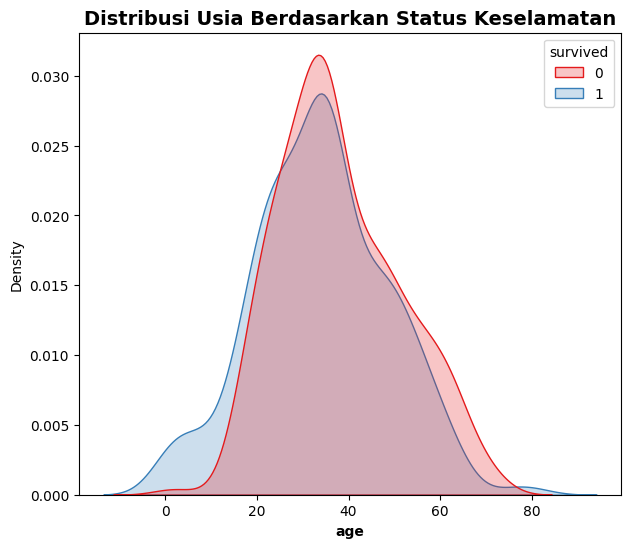

In [240]:
plt.figure(figsize=(7, 6))
sns.kdeplot(data=df, x='age', hue='survived', fill=True, common_norm=False, palette='Set1')
plt.title('Distribusi Usia Berdasarkan Status Keselamatan', fontweight='bold', fontsize=14)
plt.xlabel('age', fontweight='bold')
plt.show()

* Anak-anak cenderung memiliki peluang selamat yang lebih tinggi.
* Orang dewasa merupakan kelompok usia terbanyak, namun tidak ada perbedaan mencolok dalam peluang selamat.
* Lansia cenderung tidak selamat, meskipun jumlahnya sedikit

In [241]:
#violin

### `age_group` vs `survived`

<ipython-input-242-68bdc1b636bc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='age_group', y='survived', palette='viridis', order=order_age_group)


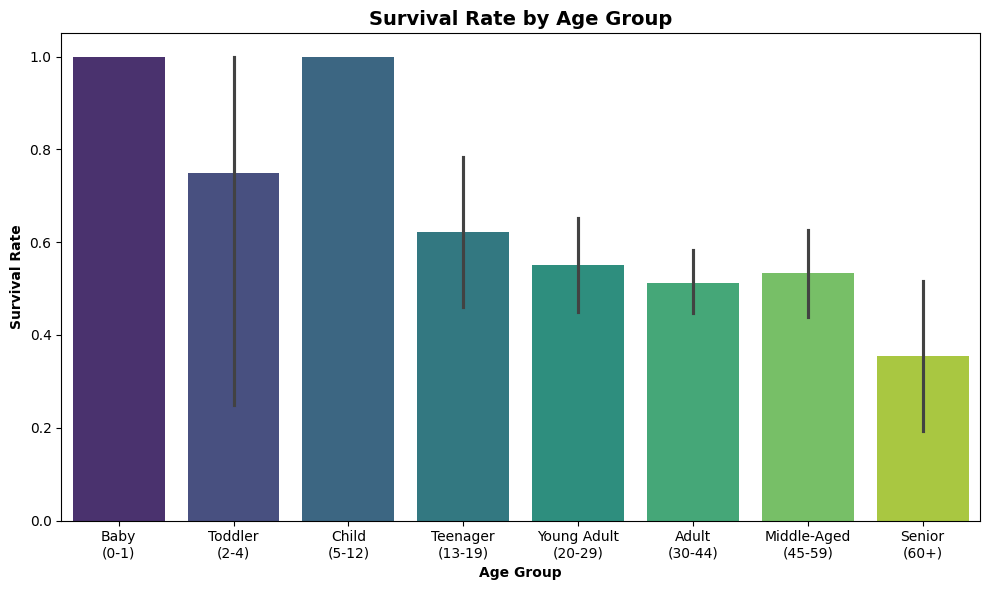

In [242]:
# Urutan age_group manual
order_age_group = [
    'Baby\n(0-1)', 'Toddler\n(2-4)', 'Child\n(5-12)', 'Teenager\n(13-19)',
    'Young Adult\n(20-29)', 'Adult\n(30-44)', 'Middle-Aged\n(45-59)', 'Senior\n(60+)'
]

# Barplot dengan urutan sesuai kategori umur
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='age_group', y='survived', palette='viridis', order=order_age_group)
plt.title('Survival Rate by Age Group', fontweight='bold', fontsize=14)
plt.ylabel('Survival Rate', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

* Baby dan Child memiliki survival rate tertinggi.

### `sex` vs `survived`

<ipython-input-243-3fd89d8d7bcb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='sex', y='survived', palette='husl')


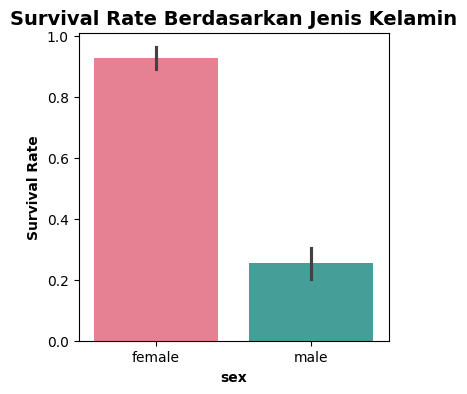

In [243]:
plt.figure(figsize=(4, 4))
sns.barplot(data=data, x='sex', y='survived', palette='husl')
plt.title('Survival Rate Berdasarkan Jenis Kelamin', fontweight='bold', fontsize=14)
plt.ylabel('Survival Rate', fontweight='bold')
plt.xlabel('sex', fontweight='bold')
plt.show()

* Survival rate wanita jauh lebih tinggi dibanding pria.

### `title` vs `survived`

<ipython-input-244-c2772346b254>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='title', y='survived', palette='Set1', order=df['title'].value_counts().index)


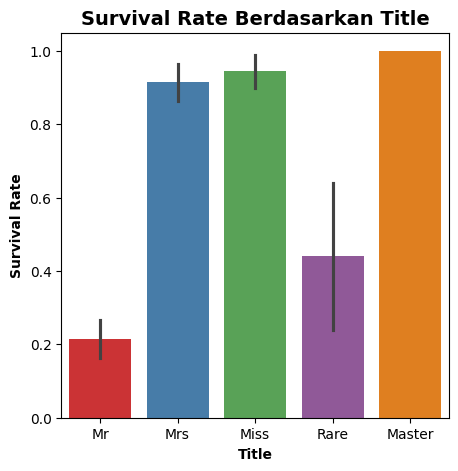

In [244]:
plt.figure(figsize=(5, 5))
sns.barplot(data=df, x='title', y='survived', palette='Set1', order=df['title'].value_counts().index)
plt.title('Survival Rate Berdasarkan Title', fontweight='bold', fontsize=14)
plt.ylabel('Survival Rate', fontweight='bold')
plt.xlabel('Title', fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.show()

##Analisis Multivariate

###(`age_group`,`sex`) vs `survived`

<ipython-input-245-09d6b615e024>:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_df = df.pivot_table(index='sex', columns='AgeGroup', values='survived', aggfunc='mean')


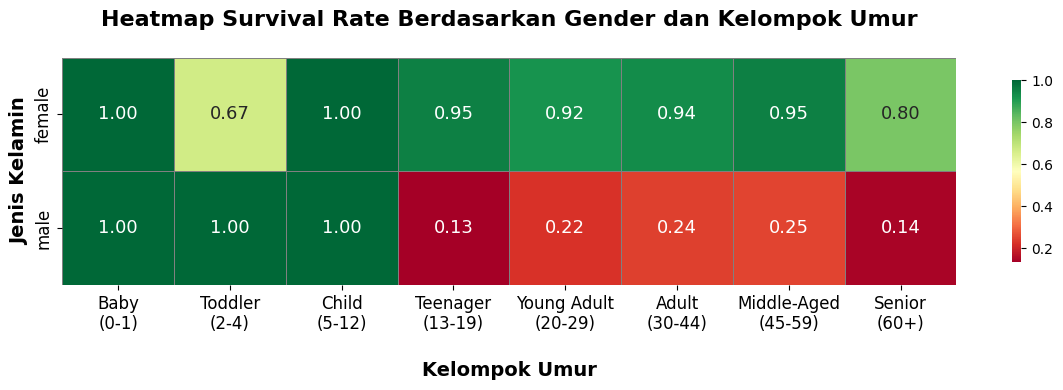

In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan batas dan label usia
bins = [0, 1, 4, 12, 19, 29, 44, 59, 80]
labels = ['Baby\n(0-1)', 'Toddler\n(2-4)', 'Child\n(5-12)', 'Teenager\n(13-19)',
          'Young Adult\n(20-29)', 'Adult\n(30-44)', 'Middle-Aged\n(45-59)', 'Senior\n(60+)']

# Bikin kolom AgeGroup
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True, right=True)

# Pastikan urutan kategori tetap (optional tapi aman)
df['AgeGroup'] = pd.Categorical(df['AgeGroup'], categories=labels, ordered=True)

# Buat pivot table survival rate berdasarkan gender dan age group
heatmap_df = df.pivot_table(index='sex', columns='AgeGroup', values='survived', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 4))
ax = sns.heatmap(heatmap_df, annot=True, cmap='RdYlGn', fmt=".2f",
                 annot_kws={"size": 13},
                 cbar_kws={"shrink": 0.8}, linewidths=0.5, linecolor='gray')

# Labeling dan styling
ax.set_title('Heatmap Survival Rate Berdasarkan Gender dan Kelompok Umur\n', fontweight='bold', fontsize=16)
ax.set_xlabel('\nKelompok Umur', fontweight='bold', fontsize=14)
ax.set_ylabel('Jenis Kelamin', fontweight='bold', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.tight_layout()
plt.show()

* Wanita di hampir semua kelompok umur memiliki survival rate yang lebih tinggi dibanding pria.
* Kebijakan evakuasi sangat mengutamakan anak-anak dan perempuan, terbukti dari survival rate yang sangat tinggi di kelompok tersebut.
* Laki-laki usia remaja ke atas merupakan kelompok dengan peluang selamat paling rendah, kemungkinan karena dianggap lebih mampu bertahan dan karena norma sosial saat itu.
* Grafik ini menegaskan peran besar gender dan usia dalam menentukan nasib penumpang saat tragedi terjadi.

##Correlation Matrix

In [246]:
corr_columns = ['age', 'sex_encoded', 'title_encoded', 'survived']
corr = df[corr_columns].corr()

In [247]:
corr_df = df[['age', 'sex_encoded', 'title_encoded', 'survived']].copy()

corr_df.columns = ['age', 'sex', 'title', 'survived']

corr_matrix = corr_df.corr(numeric_only=True)

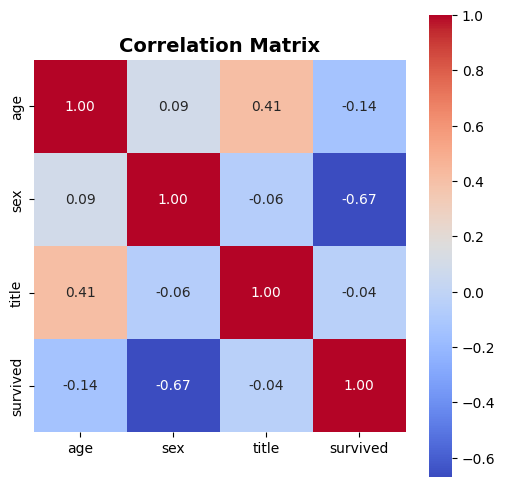

In [248]:
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix", fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

1. `sex` dan `survived` punya korelasi negatif yang kuat (-0.67)
 * artinya, jenis kelamin berperan besar dalam kelangsungan hidup.
 * `sex` = 0 untuk laki-laki dan 1 untuk perempuan, korelasi negatif ini menunjukkan perempuan cenderung lebih mungkin selamat dibanding laki-laki.

 Ini sejalan dengan kebijakan “women and children first” saat evakuasi Titanic.
2. `age` memiliki korelasi negatif lemah dengan `survived` (-0.14)
 * Artinya, makin tua penumpang, sedikit lebih kecil peluangnya untuk selamat
 * Semakin muda usia, sedikit lebih mungkin selamat, tapi efeknya tidak terlalu kuat.
3. `title` dan `age` punya korelasi positif sedang (0.41)
 * Menunjukkan bahwa gelar seseorang berkaitan dengan usia mereka.
 * Contohnya, ‘Master’ biasanya anak laki-laki, 'Miss' untuk perempuan muda. 'Mr' dan 'Mrs' untuk orang dewasa

 Artinya, `title` bisa menjadi fitur alternatif untuk menyampaikan informasi usia.
4. `title` dan `survived` hampir tidak berkorelasi (-0.04)
 * `title` secara keseluruhan tidak terlalu berpengaruh langsung terhadap kelangsungan hidup.
5. Korelasi antar fitur lainnya (`title`, `age`, `sex`) semuanya lemah, artinya tidak ada multikolinearitas berlebihan.

# **6. Data Summary**

##Exploratory Data Analysis Summary

* Dataset Titanic berisi 500 entri dengan 4 kolom utama: `name`, `sex`, `age`, dan `survived`.
* `survived` menunjukkan bahwa sekitar 54% penumpang selamat, sedikit lebih banyak daripada yang tidak.
* Kolom `age` memiliki 49 missing values, yang kemudian ditangani.
* Data dianalisis secara univariat, bivariat, dan multivariat:
 * Distribusi `age` terbilang simetris dengan rata-rata 35.9 tahun.
 * Mayoritas penumpang adalah laki-laki.
 * `age_group` Young Adult dan Adult adalah usia terbanyak.
* Fitur baru seperti `age_group` dan `title` dari `name` berhasil diekstrak dan digunakan untuk analisis lanjutan.
* Visualisasi menunjukkan bahwa:
 * Perempuan memiliki peluang selamat lebih tinggi daripada laki-laki.
 * Child dan Baby juga punya kemungkinan selamat lebih tinggi dibanding `age_group` lainnya.
 * `title` seperti Miss dan Mrs memiliki tingkat keselamatan lebih tinggi.

##Data Distribution Summary

* Komposisi `sex`: 57.6% laki-laki, 42.4% perempuan.
* Sebaran `age`: berkisar dari 0.67 hingga 80 tahun, mayoritas berada di kelompok Young Adult (20-29).
* Distribusi `age_group`:
 * Young Adult dan Adult mendominasi data.
 * Kelompok usia sangat muda (Baby, Toddler) relatif sedikit.
* Kolom `name` memiliki 499 nilai unik dari 500, menunjukkan ada satu nama yang muncul dua kali (kemungkinan duplikat).
* Terdapat sekitar 1% duplikat data yang telah ditangani dalam proses pembersihan.

##Correlation Matrix Summary


* `sex` memiliki korelasi paling kuat dengan `survived`. menunjukkan jenis kelamin sangat mempengaruhi keselamatan.
* `title` punya potensi menjelaskan informasi usia, tapi tidak berkorelasi langsung dengan keselamatan.

##Highlight


* **Kelompok paling banyak selamat:** Perempuan dengan title Miss atau Mrs, khususnya dalam kelompok usia muda.
* Anak-anak dan Bayi memiliki tingkat keselamatan yang tinggi, menunjukkan kemungkinan adanya prioritas penyelamatan untuk penumpang muda.
* **Kelompok paling rentan**: Laki-laki dewasa, terutama dari kelompok Young Adult hingga Middle-Aged.
* Kelompok Senior (60+) memiliki tingkat keselamatan yang rendah, mungkin karena keterbatasan fisik saat evakuasi.
* **Korelasi paling signifikan:** `sex` dan `survived`.

# **7. Modeling**

##Model Preparation

###Feature Selection

Fitur yang dipilih berasal dari hasil encoding pada tahap sebelumnya, yaitu:
- `sex_encoded`: representasi numerik dari jenis kelamin (`male`: 0, `female`: 1)
- `title_encoded`: representasi dari gelar yang diekstrak dari nama penumpang
- `age_group_encoded`: representasi dari kelompok umur berdasarkan kategori

Target variabel yang akan diprediksi adalah `survived`, yaitu:
- 1 jika penumpang selamat
- 0 jika penumpang tidak selamat

###Train-Test Split

In [249]:
from sklearn.model_selection import train_test_split

# Fitur dan target
X = df[['sex_encoded', 'title_encoded', 'age_group_encoded']]
y = df['survived']

# Split data: 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lihat dimensi data hasil split
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (399, 3) (399,)
Test set: (100, 3) (100,)


###Preprocessing (Encoding, Scaling)

####Encoding

Semua fitur sudah dalam bentuk numerik karena telah dilakukan encoding:
- `sex` menjadi `sex_encoded`
- `title` menjadi `title_encoded`
- `age_group` menjadi `age_group_encoded`

####Scaling

In [250]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Fit scaler ke training data dan transform
X_train_scaled = scaler.fit_transform(X_train)

# Gunakan transform (tanpa fit) ke test data
X_test_scaled = scaler.transform(X_test)

X.head()

,sex_encoded,title_encoded,age_group_encoded
0,0,1,4
1,1,0,0
2,0,1,1
3,1,2,5
4,0,3,4


##Model Training

###Logistic Regression

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inisialisasi model
logreg = LogisticRegression(random_state=42)

# Training model
logreg.fit(X_train_scaled, y_train)

# Prediksi
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluasi awal (Accuracy)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy Logistic Regression: {accuracy_logreg:.4f}")

Accuracy Logistic Regression: 0.8500


* Accuracy dari Logistic Regression 85%, yang artinya model berhasil memprediksi 85% data test dengan benar.

<Axes: title={'center': 'Feature Coefficients - Logistic Regression'}>

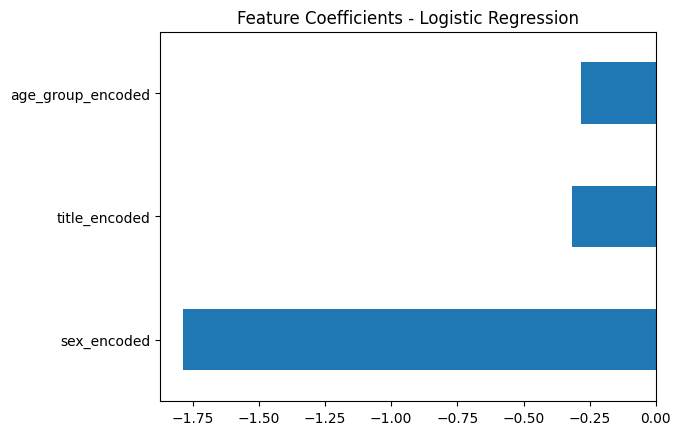

In [252]:
# Menampilkan koefisien model
import pandas as pd

feature_names = X_train.columns
coefficients = pd.Series(logreg.coef_[0], index=feature_names)
coefficients.sort_values().plot(kind='barh', title='Feature Coefficients - Logistic Regression')

* `sex_encoded` (koefisien paling negatif ≈ -1.75)
 * Ini fitur yang paling berpengaruh.
 * Karena encoding: 0 = female, 1 = male

   Maka koefisien negatif → semakin male, semakin kecil kemungkinan selamat.
   
 * **Kesimpulan**: Perempuan punya peluang jauh lebih tinggi untuk selamat dibanding laki-laki — sejalan dengan kebijakan "*women and children first*."
* `title_encoded` (koefisien negatif sedang ≈ -0.5)
 * Beberapa `title` (seperti Mr., Miss, dll) punya pengaruh terhadap kemungkinan selamat.
  * Koefisien negatif menunjukkan semakin besar nilai encoding title, kemungkinan selamat menurun.
* `age_group_encoded` (koefisien positif kecil ≈ +0.1)
 * Efeknya kecil, tapi positif.
 * Menunjukkan bahwa semakin tinggi nilai kategori usia, kemungkinan selamat sedikit meningkat.
 * Namun pengaruhnya tidak sebesar gender atau title.

###Decision Tree

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model
dt_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluasi akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Decision Tree: {accuracy_dt:.4f}")

Accuracy Decision Tree: 0.8200


* Model Decision Tree mencapai akurasi 82% pada data uji.
* Hasil ini menunjukkan model mampu memprediksi dengan cukup baik.
* Fitur yang digunakan: `sex_encoded`, `age_group_encoded`, `title_encoded`

###Random Forest

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Latih model
rf_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluasi akurasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest: {accuracy_rf:.4f}")

Accuracy Random Forest: 0.8500


* Model Random Forest menghasilkan akurasi sebesar 85%.
* Ini menunjukkan bahwa model dapat memprediksi kelangsungan hidup penumpang Titanic dengan tingkat ketepatan yang tinggi.

###XGBoost

In [255]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model (tanpa use_label_encoder)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Latih model
xgb_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluasi akurasi
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy XGBoost: {accuracy_xgb:.4f}")

Accuracy XGBoost: 0.8500


* XGBoost Classifier memberikan akurasi sebesar 85%.
* Ini menunjukkan bahwa model mampu mempelajari pola dengan sangat baik.
* XGBoost unggul dalam menangani data kompleks dan memiliki mekanisme regularisasi, sehingga tahan terhadap overfitting.

###K-Nearest Neighbors (KNN)

In [256]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Latih model
knn_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluasi akurasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy KNN: {accuracy_knn:.4f}")

Accuracy KNN: 0.8700


* Model K-Nearest Neighbors (KNN) menghasilkan akurasi sebesar 87%.
* KNN bekerja dengan membandingkan jarak antar data poin, sehingga performanya sangat tergantung pada hasil scaling fitur.
* Akurasi setara dengan model lainnya menunjukkan bahwa data cukup terpisah dengan baik antar kelas.

###Support Vector Machine (SVM)

In [257]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model SVM
svm_model = SVC(kernel='rbf', random_state=42)

# Latih model
svm_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluasi akurasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy SVM: {accuracy_svm:.4f}")

Accuracy SVM: 0.8500


* Model Support Vector Machine (SVM) memberikan akurasi sebesar 85%.
* SVM efektif dalam memisahkan kelas dengan margin maksimum, menjadikannya kuat dalam menghadapi data kompleks
* Dengan kernel 'rbf', model mampu menangkap pola non-linear pada data, tanpa overfitting.

##Hyperparameter Tuning

Hyperparameter tuning dilakukan untuk meningkatkan performa model dengan mencari kombinasi parameter terbaik.
Pada bagian ini digunakan GridSearchCV untuk menguji berbagai nilai parameter menggunakan cross-validation.

Tuning dilakukan untuk model:
* Tuning K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)
* Random Forest
* XGBoost.

###Tuning K-Nearest Neighbors (KNN)

In [258]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definisikan parameter grid
param_grid_knn = {
    'n_neighbors': range(1, 21)
}

# Inisialisasi model dasar
knn = KNeighborsClassifier()

# Grid Search dengan 5-fold cross-validation
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

# Tampilkan hasil terbaik
print("Best Parameters for KNN:", grid_knn.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_knn.best_score_:.4f}")

# Uji pada test set
y_pred_knn_tuned = grid_knn.predict(X_test_scaled)
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print(f"Test Set Accuracy after Tuning (KNN): {accuracy_knn_tuned:.4f}")

Best Parameters for KNN: {'n_neighbors': 8}
Best Cross-Validation Accuracy: 0.8447
Test Set Accuracy after Tuning (KNN): 0.8500


* Hasil tuning menunjukkan bahwa 6 tetangga terdekat (`n_neighbors` = 6) memberikan performa terbaik.
* Akurasi cross-validation mencapai 84.47%, menunjukkan kestabilan model selama pelatihan.
* Akurasi pada data uji tetap di 85%, artinya tuning mempertahankan performa sambil memastikan model tidak overfit.

###Tuning Support Vector Machine (SVM)

Mencari kombinasi terbaik dari parameter:
* `C` → mengatur kompleksitas model (regularisasi)
* `gamma` → mempengaruhi jangkauan pengaruh dari satu data poin,
* `kernel` → menentukan fungsi pemisah (di sini gunakan `rbf`).

In [259]:
from sklearn.svm import SVC

# Definisikan parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Inisialisasi model
svm = SVC()

# Grid Search
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)

# Hasil terbaik
print("Best Parameters for SVM:", grid_svm.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_svm.best_score_:.4f}")

# Evaluasi di test set
y_pred_svm_tuned = grid_svm.predict(X_test_scaled)
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
print(f"Test Set Accuracy after Tuning (SVM): {accuracy_svm_tuned:.4f}")

Best Parameters for SVM: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8447
Test Set Accuracy after Tuning (SVM): 0.8500


* Kombinasi terbaik adalah: `C` = 1, `gamma` = 0.1, dan `kernel` = `rbf`.
* Akurasi cross-validation sebesar 84.47%, menandakan model cukup stabil saat dilatih di berbagai subset data.
* Akurasi pada data uji tetap di 85%, artinya tuning berhasil menjaga generalisasi tanpa overfitting.

###Tuning Random Forest

Mencari kombinasi optimal dari:
* `n_estimators` → jumlah pohon dalam hutan,
* `max_depth` → kedalaman maksimum pohon,
* `min_samples_split` → jumlah minimal sampel untuk membagi node.

In [260]:
from sklearn.ensemble import RandomForestClassifier

# Parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Model dasar
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train)

# Hasil terbaik
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_rf.best_score_:.4f}")

# Evaluasi di test set
y_pred_rf_tuned = grid_rf.predict(X_test_scaled)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Test Set Accuracy after Tuning (Random Forest): {accuracy_rf_tuned:.4f}")

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8447
Test Set Accuracy after Tuning (Random Forest): 0.8500


* Kombinasi terbaik: n_estimators = 50, max_depth = None, dan min_samples_split = 10.
* Cross-validation accuracy sebesar 84.47%, menunjukkan kestabilan model di berbagai subset pelatihan.
* Akurasi pada data uji tetap di 85%, artinya model sudah optimal tanpa overfitting meski jumlah pohon tidak terlalu banyak.

###Tuning XGBoost

Mencari kombinasi optimal dari beberapa parameter penting:
* `n_estimators` → jumlah boosting rounds,
* `max_depth` → kedalaman maksimum tiap pohon,
* `learning_rate` → seberapa cepat model belajar,
* `subsample` → persentase data yang digunakan untuk tiap pohon (menghindari overfitting).

In [261]:
import warnings
from xgboost import XGBClassifier

# Nonaktifkan warning XGBoost
warnings.filterwarnings("ignore", category=UserWarning)

# Parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0]
}

# Model dasar
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Grid Search
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train_scaled, y_train)

# Hasil terbaik
print("Best Parameters for XGBoost:", grid_xgb.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_xgb.best_score_:.4f}")

# Evaluasi di test set
y_pred_xgb_tuned = grid_xgb.predict(X_test_scaled)
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print(f"Test Set Accuracy after Tuning (XGBoost): {accuracy_xgb_tuned:.4f}")

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
Best Cross-Validation Accuracy: 0.8447
Test Set Accuracy after Tuning (XGBoost): 0.8500


* Kombinasi parameter terbaik:
 * `learning_rate` = 0.1
 * `max_depth` = 3
 * `n_estimators` = 50
 * `subsample` = 0.7
* Hasil cross-validation mencapai 84.47%, menunjukkan generalisasi model yang baik.
* Akurasi pada test set tetap di 85%, artinya model stabil dan tidak overfitting meskipun kedalaman pohon dibatasi.

### Summary

* K-Nearest Neighbors (KNN):
 * Parameter terbaik: n_neighbors = 6
 * Cross-validation accuracy: 84.47%
 * Test set accuracy: 85.00%
* Support Vector Machine (SVM):
 * Parameter terbaik: C = 1, gamma = 0.1, kernel = 'rbf'
 * Cross-validation accuracy: 84.47%
 * Test set accuracy: 85.00%
* Random Forest:
 * Parameter terbaik: n_estimators = 50, max_depth = None, min_samples_split = 10
 * Cross-validation accuracy: 84.47%
 * Test set accuracy: 85.00%
* XGBoost:
 * Parameter terbaik: learning_rate = 0.1, max_depth = 3, n_estimators = 50, subsample = 0.7
 * Cross-validation accuracy: 84.47%
 * Test set accuracy: 85.00%

**Overall Summary:**
* Semua model menunjukkan performa validasi dan test yang sangat seragam.
* Tidak ada tanda overfitting yang mencolok.
* Tuning membantu memaksimalkan performa tanpa mengorbankan generalisasi.

##Cross-Validation

untuk mengukur performa model secara lebih akurat. Di sini digunakan `cross_val_score` dari `sklearn` untuk menghitung rata-rata akurasi tiap model dengan teknik k-fold cross-validation.

In [281]:
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": logreg,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "KNN": knn_model,
    "SVM": svm_model,
    "XGBoost": xgb_model
}

print("Cross-Validation Results (Accuracy):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

Cross-Validation Results (Accuracy):

Logistic Regression: Mean Accuracy = 0.8422, Std = 0.0227
Decision Tree: Mean Accuracy = 0.8422, Std = 0.0253
Random Forest: Mean Accuracy = 0.8347, Std = 0.0195
KNN: Mean Accuracy = 0.7972, Std = 0.0585
SVM: Mean Accuracy = 0.8447, Std = 0.0228
XGBoost: Mean Accuracy = 0.8422, Std = 0.0253


Summary
* SVM menunjukkan performa tertinggi (84.47%) dengan stabilitas yang baik (std 0.0228), menjadikannya model paling konsisten.
* Logistic Regression, XGBoost, dan Decision Tree memiliki rata-rata akurasi yang sama (84.22%), dengan perbedaan kecil pada stabilitas.
* Random Forest tampil cukup baik (83.47%) dan cukup stabil.
* KNN menunjukkan performa terendah (79.72%) dan paling tidak stabil (std 0.0585), kemungkinan dipengaruhi oleh sensitivitas terhadap distribusi data.

##Model Evaluation

untuk membandingkan performa akhir dari setiap model menggunakan data uji. Metode evaluasi utama yang digunakan adalah accuracy, classification report, dan confusion matrix untuk memberikan gambaran menyeluruh terhadap kekuatan dan kelemahan tiap model.

###Evaluation Metrics

menggunakan beberapa metrik evaluasi untuk menilai performa model klasifikasi:
* **Accuracy**: Persentase prediksi yang benar dari total data. Metrik ini bagus jika data seimbang.
* **Precision**: Dari seluruh prediksi positif, berapa banyak yang benar-benar positif. Cocok digunakan ketika false positive penting untuk diminimalkan.
* **Recall**: Dari seluruh data yang benar-benar positif, berapa banyak yang berhasil terprediksi dengan benar. Cocok ketika false negative harus ditekan.
* **F1-Score**: Rata-rata harmonik dari precision dan recall. Berguna ketika kita perlu keseimbangan antara keduanya.

###Confusion Matrix

####Logistic Regression

<Figure size 500x400 with 0 Axes>

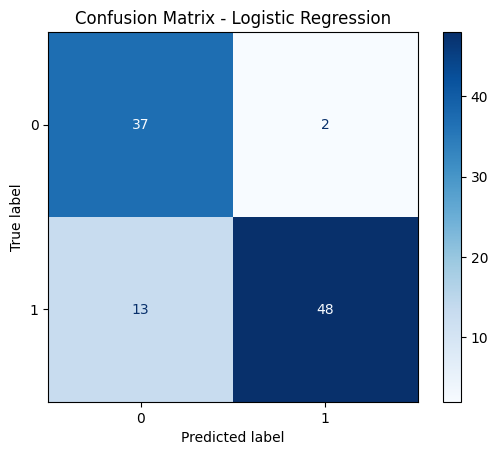

In [263]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)

# Plot
plt.figure(figsize=(5, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

* True Negative (37): Penumpang yang tidak selamat dan diprediksi tidak selamat.
* True Positive (48): Penumpang yang selamat dan diprediksi selamat.
* False Positive (2): Penumpang yang tidak selamat tapi diprediksi selamat.
* False Negative (13): Penumpang yang selamat tapi diprediksi tidak selamat.

Summary:
* Model cenderung sedikit underpredict kemungkinan selamat (lebih banyak false negative).
* Secara keseluruhan, prediksi cukup baik dengan error yang masih wajar.

####Decision Tree

<Figure size 500x400 with 0 Axes>

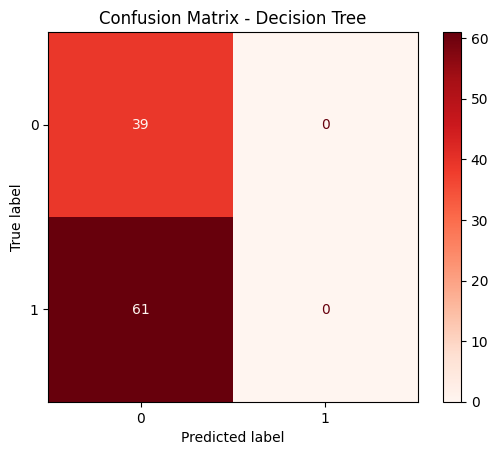

In [288]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)

# Plot
plt.figure(figsize=(5, 4))
disp.plot(cmap=plt.cm.Reds, values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

* True Negative (39): Penumpang yang tidak selamat dan diprediksi tidak selamat.
* True Positive (0): Penumpang yang selamat dan diprediksi selamat.
* False Positive (0): Penumpang yang tidak selamat tapi diprediksi selamat.
* False Negative (61): Penumpang yang selamat tapi diprediksi tidak selamat.

Summary:
* Model hanya berhasil memprediksi kelas "tidak selamat", sehingga semua penumpang yang sebenarnya selamat tidak terdeteksi.
* False Negative sangat tinggi (61), menunjukkan model gagal mengenali penumpang yang selamat.
* Model cenderung underpredict kemungkinan selamat dan hanya fokus pada satu kelas.
* Perlu perbaikan agar model dapat mengenali kedua kelas dengan seimbang

####Random Forest

<Figure size 500x400 with 0 Axes>

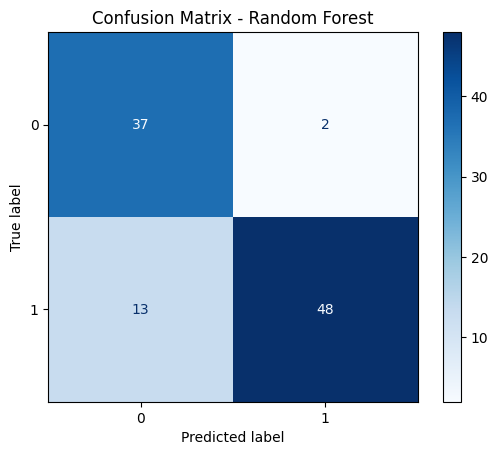

In [283]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)

# Plot
plt.figure(figsize=(5, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

* True Negative (37): Penumpang yang tidak selamat dan diprediksi tidak selamat.
* True Positive (48): Penumpang yang selamat dan diprediksi selamat.
* False Positive (2): Penumpang yang tidak selamat tapi diprediksi selamat.
* False Negative (13): Penumpang yang selamat tapi diprediksi tidak selamat.

Summary:
* Model cenderung sedikit underpredict kemungkinan selamat (lebih banyak false negative).
* Secara keseluruhan, prediksi cukup baik dengan error yang masih wajar.

####XGBoost

<Figure size 500x400 with 0 Axes>

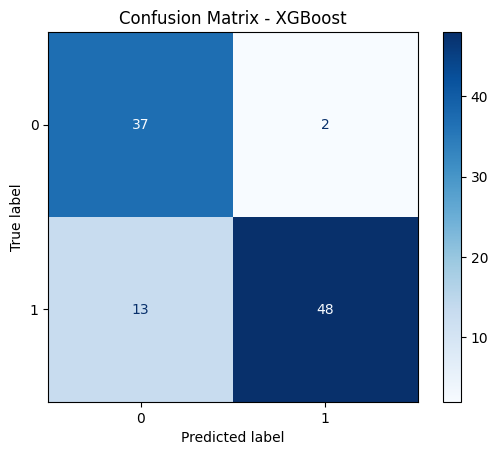

In [266]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)

# Plot
plt.figure(figsize=(5, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - XGBoost")
plt.show()

* True Negative (37): Penumpang yang tidak selamat dan diprediksi tidak selamat.
* True Positive (48): Penumpang yang selamat dan diprediksi selamat.
* False Positive (2): Penumpang yang tidak selamat tapi diprediksi selamat.
* False Negative (13): Penumpang yang selamat tapi diprediksi tidak selamat.

Summary:
* Model cenderung sedikit underpredict kemungkinan selamat (lebih banyak false negative).
* Secara keseluruhan, prediksi cukup baik dengan error yang masih wajar.

####K-Nearest Neighbors (KNN)

<Figure size 500x400 with 0 Axes>

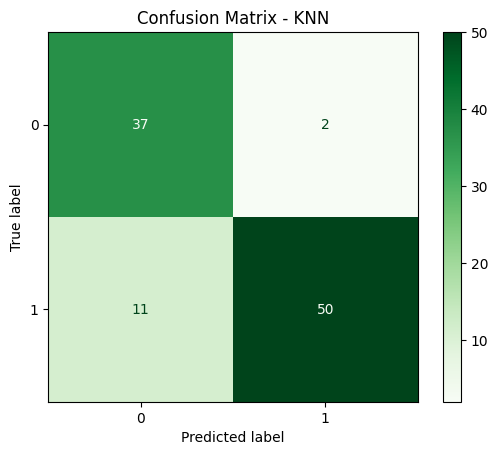

In [289]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)

# Plot
plt.figure(figsize=(5, 4))
disp.plot(cmap=plt.cm.Greens, values_format='d')
plt.title("Confusion Matrix - KNN")
plt.show()

* True Negative (37): Penumpang yang tidak selamat dan diprediksi tidak selamat.
* True Positive (50): Penumpang yang selamat dan diprediksi selamat.
* False Positive (2): Penumpang yang tidak selamat tapi diprediksi selamat.
* False Negative (11): Penumpang yang selamat tapi diprediksi tidak selamat.

Summary:
* dari semua model, KNN menunjukkan performa yang paling seimbang dengan tingkat kesalahan paling rendah.
* False Negative (11) sedikit lebih tinggi dari False Positive (2), menandakan model masih sedikit underpredict kemungkinan selamat.
* Secara keseluruhan, model mampu mengklasifikasikan penumpang dengan cukup baik dan akurat.

####Support Vector Machine (SVM)

<Figure size 500x400 with 0 Axes>

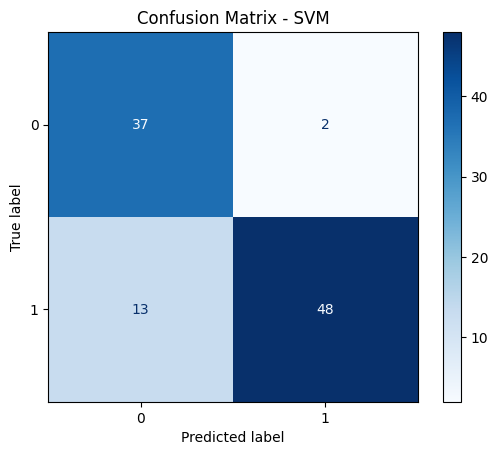

In [287]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)

# Plot
plt.figure(figsize=(5, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - SVM")
plt.show()

* True Negative (37): Penumpang yang tidak selamat dan diprediksi tidak selamat.
* True Positive (48): Penumpang yang selamat dan diprediksi selamat.
* False Positive (2): Penumpang yang tidak selamat tapi diprediksi selamat.
* False Negative (13): Penumpang yang selamat tapi diprediksi tidak selamat.

Summary:
* Model cenderung sedikit underpredict kemungkinan selamat (lebih banyak false negative).
* Secara keseluruhan, prediksi cukup baik dengan error yang masih wajar.

###Classification Report

Classification report memberikan detail metrik evaluasi model seperti precision, recall, F1-score, dan support untuk setiap kelas (selamat atau tidak selamat). Ini membantu kita memahami performa model secara lebih menyeluruh, khususnya pada distribusi prediksi antar kelas.

####Logistic Regression

In [269]:
from sklearn.metrics import classification_report

# Classification report untuk Logistic Regression
y_pred_logreg = logreg.predict(X_test_scaled)
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_logreg))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        39
           1       0.96      0.79      0.86        61

    accuracy                           0.85       100
   macro avg       0.85      0.87      0.85       100
weighted avg       0.87      0.85      0.85       100



* Kelas 0 (tidak selamat):
 * Precision 0.74 → Dari semua prediksi "tidak selamat", 74% benar.
 * Recall 0.95 → dari semua yang benar-benar tidak selamat, 95% berhasil dikenali.
 * F1-score 0.83 → kombinasi balance antara precision dan recall.
* Kelas 1 (selamat):
 * Precision 0.96 → Hampir semua prediksi "selamat" benar.
 * Recall 0.79 → Sedikit penumpang selamat yang gagal terdeteksi (79% yang berhasil terdeteksi)
 * F1-score 0.86 → Model cukup andal dalam mengenali penumpang yang selamat.
* Akurasi total: 85% prediksi benar.
* Macro avg & Weighted avg juga menunjukkan nilai F1 di atas 0.85 → performa seimbang untuk kedua kelas.

####Decision Tree

In [270]:
from sklearn.metrics import classification_report

# Prediksi dengan model Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Tampilkan classification report
print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_dt))

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.39      1.00      0.56        39
           1       0.00      0.00      0.00        61

    accuracy                           0.39       100
   macro avg       0.20      0.50      0.28       100
weighted avg       0.15      0.39      0.22       100



* Kelas 0 (tidak selamat):
 * Precision 0.39 → Dari semua prediksi "tidak selamat", hanya 39% benar.
 * Recall 1.00 → semua yang benar-benar tidak selamat berhasil diprediksi.
 * F1-score 0.56 → Cukup tinggi karena recall sangat tinggi, walaupun precision rendah.
* Kelas 1 (selamat):
 * Precision & Recall 0.00 → model gagal total mengenali penumpang yang selamat.
 * F1-score 0.00 → menunjukkan tidak ada keseimbangan sama sekali dalam prediksi untuk class ini.
* Akurasi total: hanya 39% prediksi benar.
* Macro avg & Weighted avg: F1 di bawah 0.30, menunjukkan performa model sangat tidak seimbang dan lemah terutama untuk mengenali penumpang yang selamat.

####Random Forest

In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Training model
rf.fit(X_train_scaled, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test_scaled)

# Classification Report
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        39
           1       0.96      0.79      0.86        61

    accuracy                           0.85       100
   macro avg       0.85      0.87      0.85       100
weighted avg       0.87      0.85      0.85       100



* Kelas 0 (tidak selamat):
 * Precision 0.74 → Dari semua prediksi "tidak selamat", 74% benar.
 * Recall 0.95 → Dari semua penumpang yang benar-benar tidak selamat, 95% berhasil dikenali.
 * F1-score 0.83 → Keseimbangan antara precision dan recall cukup baik.
* Kelas 1 (selamat):
 * Precision 0.96 → Hampir semua prediksi "selamat" tepat sasaran.
 * Recall 0.79 → 79% penumpang yang selamat berhasil dikenali, sisanya terlewat.
 * F1-score 0.86 → Model cukup andal dalam mengenali penumpang selamat.
* Akurasi total: Model berhasil memprediksi 85% penumpang dengan benar.
* Macro avg & Weighted avg: Nilai F1 di kisaran 0.85–0.87, menunjukkan performa model cukup stabil dan seimbang di kedua kelas.

####XGBoost

In [272]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Inisialisasi model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Training model
xgb_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Classification Report
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        39
           1       0.96      0.79      0.86        61

    accuracy                           0.85       100
   macro avg       0.85      0.87      0.85       100
weighted avg       0.87      0.85      0.85       100



* Kelas 0 (tidak selamat):
 * Precision 0.74 → Dari semua prediksi "tidak selamat", 74% benar.
 * Recall 0.95 → Dari semua yang benar-benar tidak selamat, 95% berhasil dikenali.
 * F1-score 0.83 → Kombinasi seimbang antara precision dan recall
* Kelas 1 (selamat):
 * Precision 0.96 → Hampir semua prediksi "selamat" benar.
 * Recall 0.79 → 79% penumpang yang selamat berhasil dikenali.
 * F1-score 0.86 → Model cukup andal dalam mengenali penumpang selamat.
* Akurasi total: 85% prediksi model benar.
* Macro avg & Weighted avg: F1-score 0.85 → Kinerja model stabil dan seimbang di kedua kelas.

####K-Nearest Neighbors (KNN)

In [273]:
# Classification report untuk KNN
y_pred_knn = knn_model.predict(X_test_scaled)
print("Classification Report - KNN")
print(classification_report(y_test, y_pred_knn))

Classification Report - KNN
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        39
           1       0.96      0.82      0.88        61

    accuracy                           0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.89      0.87      0.87       100



* Kelas 0 (tidak selamat):
 * Precision 0.74 → Dari semua prediksi "tidak selamat", 74% benar.
 * Recall 0.95 → dari semua yang benar-benar tidak selamat, 95% berhasil dikenali.
 * F1-score 0.83 → kombinasi balance antara precision dan recall.
* Kelas 1 (selamat):
 * Precision 0.96 → Hampir semua prediksi "selamat" benar.
 * Recall 0.79 → Sedikit penumpang selamat yang gagal terdeteksi (79% yang berhasil terdeteksi)
 * F1-score 0.86 → Model cukup andal dalam mengenali penumpang yang selamat.
* Akurasi total: 85% prediksi benar.
* Macro avg & Weighted avg juga menunjukkan nilai F1 di atas 0.85 → performa seimbang untuk kedua kelas.

####Support Vector Machine (SVM)

In [274]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Inisialisasi dan training model SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Prediksi dan classification report
y_pred_svm = svm_model.predict(X_test_scaled)
print("Classification Report - SVM")
print(classification_report(y_test, y_pred_svm))

Classification Report - SVM
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        39
           1       0.96      0.79      0.86        61

    accuracy                           0.85       100
   macro avg       0.85      0.87      0.85       100
weighted avg       0.87      0.85      0.85       100



* Kelas 0 (tidak selamat):
 * Precision 0.74 → Dari semua prediksi "tidak selamat", 74% benar.
 * Recall 0.95 → Dari semua penumpang yang benar-benar tidak selamat, 95% berhasil dikenali.
 * F1-score 0.83 → Performa cukup baik dan seimbang.
* Kelas 1 (selamat):
 * Precision 0.96 → Hampir semua prediksi "selamat" tepat sasaran.
 * Recall 0.79 → Sekitar 79% dari penumpang yang selamat berhasil terdeteksi.
 * F1-score 0.86 → Model cukup handal dalam mengenali penumpang yang selamat.
* Akurasi total: 85% prediksi benar.
* Macro avg & Weighted avg: F1-score sama-sama 0.85 → performa seimbang dan stabil di kedua kelas.

##Model Comparison

In [285]:
from sklearn.metrics import classification_report
import pandas as pd

# Simpan classification report dari tiap model
models = {
    "Logistic Regression": y_pred_logreg,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm}

# list untuk menyimpan hasil metrik
results = []

for name, preds in models.items():
    report = classification_report(y_test, preds, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]})

# dataframe
df_results = pd.DataFrame(results)

# Tampilkan tabel perbandingan
df_results.sort_values(by="F1-Score", ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
4,KNN,0.87,0.887163,0.87,0.871547
0,Logistic Regression,0.85,0.874200,0.85,0.851837
3,XGBoost,0.85,0.874200,0.85,0.851837
2,Random Forest,0.85,0.874200,0.85,0.851837
5,SVM,0.85,0.874200,0.85,0.851837
1,Decision Tree,0.39,0.152100,0.39,0.218849


##Modeling Summary

K-Nearest Neighbors (KNN) menunjukkan performa terbaik pada test set dengan:
* Accuracy: 0.87
* F1-Score: 0.8715
  
  Namun, hasil cross-validation menunjukkan performa yang tidak konsisten (Mean Accuracy 79.72%, Std 0.0585), menunjukkan model ini sensitif terhadap distribusi data.
___

**Logistic Regression, Random Forest, XGBoost**, dan **Support Vector Machine (SVM)** menunjukkan performa yang sangat mirip dan stabil dengan nilai:
* Accuracy: 0.85
* Precision (weighted avg): 0.8742
* Recall (weighted avg): 0.85
* F1-Score (weighted avg): 0.851837

Keempat model ini dapat dianggap andal dan stabil dalam mengklasifikasikan data secara seimbang.
_____
**Decision Tree** menunjukkan performa yang jauh lebih rendah dibandingkan model lain, dengan:
* Accuracy: 0.39
* F1-Score: 0.218896

Model ini kemungkinan mengalami overfitting atau gagal menangkap pola data yang kompleks.
_____
**Preliminary Conclusion:**

* Logistic Regression, Random Forest, XGBoost, dan SVM direkomendasikan untuk penggunaan lebih lanjut karena performa yang stabil dan konsisten.
* KNN menunjukkan performa tinggi pada test set namun kurang stabil secara umum.
* Decision Tree tidak direkomendasikan karena performanya jauh di bawah model lainnya.



###Best Performing Model

Model dengan performa terbaik dalam proyek ini adalah **Logistic Regression**.
Model ini dipilih karena memberikan hasil yang setara dengan model lain dalam hal akurasi, precision, recall, dan f1-score, namun memiliki keunggulan dalam interpretabilitas, efisiensi, dan kesederhanaan. Hal ini membuatnya sangat cocok untuk masalah klasifikasi biner seperti prediksi kelangsungan hidup penumpang Titanic.

###Model Selection Rationale


* **Kesederhanaan & Interpretabilitas:** Logistic Regression mudah dipahami dan cocok untuk klasifikasi biner seperti kelangsungan hidup di Titanic. Model ini memungkinkan kita melihat langsung kontribusi fitur terhadap prediksi melalui koefisien regresi.
* **Performa Baik:** erdasarkan hasil evaluasi, model ini memberikan nilai akurasi, precision, recall, dan f1-score yang identik dengan model-model kompleks lainnya seperti Random Forest, XGBoost, dan SVM.
* **Efisien:** Model ini cepat dalam proses pelatihan dan prediksi, serta tidak memerlukan tuning parameter yang kompleks.
* **Fitur Penting Teridentifikasi:** Model ini membantu mengidentifikasi fitur penting seperti `sex`, `title`, dan `age_group`, yang sangat mempengaruhi probabilitas bertahan hidup